# Sample size calculations

If the alternative hypothesis is true, we can still fail to reject the null hypothesis by chance (false negative). Power is one minus the fraction of times we expect to reject the null hypothesis at significance level ($\alpha$)if the alternative hypothesis is true and we repeatedly carried out the same experiment. It depends on sample size (larger = more power) and how "different" we want the alternative hypothesis to be from the null hypothesis (effect size). Since $\alpha =0.05% and $\beta = 0.8$ are often chosen by tradition, we can calculate the sample size needed for a single hypothesis test if we know the effect size, or vice versa. The effect size is generally provided by the investigator as the minimum difference that is biologically/clinically meaningful. Sometimes the effect size is chosen so that differences at least as large as previously observed (e.g. in pilot experiments or from literature) can be detected.

For many tests, power calculators can be found in R packages. The definition of the effect size varies depending on the test used, but is generally some measure of distance between distributions that is independent of the variances of the distributions.

More generally, you can always run a simulation to estimate power as illustrated in this notebook.

## Using a package

In [58]:
library(pwr)
suppressMessages(library(tidyr))
suppressMessages(library(ggplot2))

### $\chi^2$ test

For the $\chi^2$ test, the effect size is $w$ is

$$
\sum{\sqrt(\frac{(r_i - s_i)^2}{r_i}}
$$

where $r_i$ = the proportion of cell $i$ expected under the null hypothesis and $s_i$ is the proportion expected under the alternative hypothesis. For example, if the null is

| | Group A | Group B |
| --- | --- | --- |
| Group 1 | 0.5 | 0.5 |
| Group 2 | 0.5 | 0.5 |

and the alternative is 


| | Group A | Group B |
| --- | --- | --- |
| Group 1 | 0.6 | 0.4 |
| Group 2 | 0.4 | 0.6 |

then the effect size $w$ is 

$$
\frac{(0.5-0.6)^2}{0.5} + \frac{(0.5-0.6)^2}{0.5} + \frac{(0.5-0.4)^2}{0.5} + \frac{(0.5-0.4)^2}{0.5} = 0.08
$$



#### To detect such a small difference with 0.8 power and 0.05 significance level, we need 1227 observations

In [5]:
pwr.chisq.test(w=0.08, df=1, sig.level = 0.05, power = 0.8)


     Chi squared power calculation 

              w = 0.08
              N = 1226.384
             df = 1
      sig.level = 0.05
          power = 0.8

NOTE: N is the number of observations


#### Independent t-test

The most commonly used effect size for the t-test is the mean absolute difference between groups divided by the pooled standard deviation

$$
d = \frac{\lvert \bar{x_1} - \bar{x_2} \rvert}{\sqrt{(\sigma_1^2 + \sigma_2^2)/2}}
$$

For example, suppose the pooled standard deviation is 10 and the mean difference between groups that we think is biologically meaningful is 5. Then $d = 0.5$

#### We need 64 observations per group 

In [8]:
pwr.t.test(d = 0.5, sig.level = 0.05, power = 0.8)


     Two-sample t test power calculation 

              n = 63.76561
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


### Creating a table of power versus sample size

In [70]:
d <- 0.5

ds <- seq(0.2, 1.0, 0.1)
bs <- seq(0.5, 0.9, 0.1)

nr <- length(ds)
nc <- length(bs)

ns <- matrix(NA, nrow = nr, ncol = nc)
for (i in 1:nr) {
    for (j in 1:nc) {
        ns[i,j] <- ceiling(pwr.t.test(d=ds[i], power = bs[j], sig.level=0.05)$n)
    }
}

In [71]:
ns <- data.frame(ns)
colnames(ns) <- bs
ns$d <- ds
ns

0.5 0.6 0.7 0.8 0.9   d
1 194 246 310 394 527 0.2
2  87 110 139 176 235 0.3
3  49  63  79 100 133 0.4
4  32  41  51  64  86 0.5
5  23  29  36  45  60 0.6
6  17  21  27  34  44 0.7
7  14  17  21  26  34 0.8
8  11  14  17  21  27 0.9
9   9  11  14  17  23 1.0

In [72]:
df <- ns %>% gather(key = b, value=n, -d)
head(df)

d   b   n
1 0.2 0.5 194
2 0.3 0.5  87
3 0.4 0.5  49
4 0.5 0.5  32
5 0.6 0.5  23
6 0.7 0.5  17

In [73]:
options(repr.plot.width=6, repr.plot.height=4)

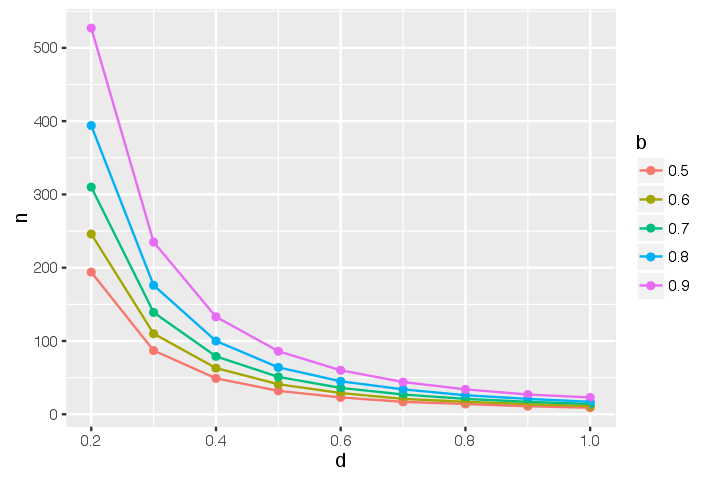

In [74]:
ggplot(df, aes(x=d, y=n, color=b)) + geom_point() + geom_line()

### Using a simulation to estimate samples size needed

Simulations provide full flexibility to set up your experimental scenario, since you generate your own data sets. Power is the proportion of times in the simulation that the p-value from applying your test of choice to the data gives less than the set significance level (traditionally 0.05).

In [112]:
d <- 0.5
ns <- 50:100
nrep = 1000

ps <- matrix(NA, nrow = length(ns), ncol = nrep)
for (i in 1:length(ns) ) {
    for (j in 1:nrep) {
        x <- rnorm(n=ns[i], mean=0.5, sd=1)
        y <- rnorm(n=ns[i], mean=0, sd=1)
        t <- t.test(x, y)
        ps[i,j] <- t$p.value
    }
}

#### We get about the same answer as with pwr.t.test that $n \approx 64$ for 80% power

In [113]:
data.frame(n=ns, power=rowSums(ps < 0.05)/nrep)

n power
1   50 0.697
2   51 0.696
3   52 0.706
4   53 0.714
5   54 0.746
6   55 0.751
7   56 0.746
8   57 0.780
9   58 0.753
10  59 0.760
11  60 0.772
12  61 0.783
13  62 0.830
14  63 0.789
15  64 0.783
16  65 0.802
17  66 0.798
18  67 0.817
19  68 0.818
20  69 0.835
21  70 0.856
22  71 0.842
23  72 0.849
24  73 0.835
25  74 0.868
26  75 0.866
27  76 0.870
28  77 0.877
29  78 0.883
30  79 0.889
31  80 0.888
32  81 0.875
33  82 0.868
34  83 0.885
35  84 0.893
36  85 0.904
37  86 0.881
38  87 0.907
39  88 0.910
40  89 0.910
41  90 0.922
42  91 0.918
43  92 0.918
44  93 0.941
45  94 0.944
46  95 0.931
47  96 0.917
48  97 0.948
49  98 0.936
50  99 0.945
51 100 0.931